In [2]:
!pip install anytree

     |████████████████████████████████| 41 kB 111 kB/s  eta 0:00:01


In [3]:
import json
from anytree import Node, RenderTree

def build_tree(json_data, parent=None):
    if isinstance(json_data, dict):
        for key, value in json_data.items():
            node = Node(key, parent=parent)
            build_tree(value, parent=node)
    elif isinstance(json_data, list):
        for item in json_data:
            build_tree(item, parent=parent)
    else:
        Node(json_data, parent=parent)

json_str = '''{
    "select": [
        {"value": "T1.department_id"},
        {"value": "T1.name"},
        {"value": {"count": "*"}}
    ],
    "from": [
        {"value": "management", "name": "T2"},
        {
            "join": {
                "name": "T1",
                "value": "department"
            },
            "on": {
                "eq": ["T1.department_id", "T2.department_id"]
            }
        }
    ],
    "groupby": {"value": "T1.department_id"},
    "having": {"gt": [{"count": "*"}, 1]}
}'''

json_data = json.loads(json_str)

root = Node("Root")
build_tree(json_data, parent=root)

for pre, fill, node in RenderTree(root):
    print(f"{pre}{node.name}")


Root
├── select
│   ├── value
│   │   └── T1.department_id
│   ├── value
│   │   └── T1.name
│   └── value
│       └── count
│           └── *
├── from
│   ├── value
│   │   └── management
│   ├── name
│   │   └── T2
│   ├── join
│   │   ├── name
│   │   │   └── T1
│   │   └── value
│   │       └── department
│   └── on
│       └── eq
│           ├── T1.department_id
│           └── T2.department_id
├── groupby
│   └── value
│       └── T1.department_id
└── having
    └── gt
        ├── count
        │   └── *
        └── 1


In [31]:
import json
from anytree import Node, RenderTree

def build_tree(data, parent=None):
    if isinstance(data, dict):
        for key, value in data.items():
            node = Node(key, parent=parent)
            build_tree(value, parent=node)
    elif isinstance(data, list):
        for item in data:
            build_tree(item, parent=parent)
    else:
        Node(str(data), parent=parent)

# data = {'select': [{'value': 'T1.department_id'}, {'value': 'T1.name'}, {'value': {'count': '*'}}], 'from': [{'value': 'management', 'name': 'T2'}, {'join': {'name': 'T1', 'value': 'department'}, 'on': {'eq': ['T1.department_id', 'T2.department_id']}}], 'groupby': {'value': 'T1.department_id'}, 'having': {'gt': [{'count': '*'}, 1]}}
data2={'select': {'value': {'count': '*'}}, 'from': 'department', 'where': {'nin': ['department_id', {'select': {'value': 'department_id'}, 'from': 'management'}]}}

root = Node('Root')
build_tree(data2, parent=root)

# Save the tree
with open('tree2.txt', 'w') as file:
    for pre, fill, node in RenderTree(root):
        file.write(f"{pre}{node.name}\n")


In [7]:
!pip install networkx

     |████████████████████████████████| 2.1 MB 12.4 MB/s eta 0:00:01


In [13]:

import networkx as nx
import json

# JSON-like structure
data = {
    'select': [
        {'value': 'T1.department_id'},
        {'value': 'T1.name'},
        {'value': {'count': '*'}}
    ],
    'from': [
        {'value': 'management', 'name': 'T2'},
        {
            'join': {
                'name': 'T1',
                'value': 'department'
            },
            'on': {
                'eq': ['T1.department_id', 'T2.department_id']
            }
        }
    ],
    'groupby': {'value': 'T1.department_id'},
    'having': {
        'gt': [{'count': '*'}, 1]
    }
}

# Create a directed graph
graph = nx.DiGraph()

def traverse_tree(data, parent_node):
    for key, value in data.items():
        if isinstance(value, list):
            for item in value:
                if isinstance(item, str):
                    node = key + ' -> ' + list(item.keys())[0]
                    graph.add_edge(parent_node, node)
                    traverse_tree(item, node)
        elif isinstance(value, dict):
            node = key
            graph.add_edge(parent_node, node)
            traverse_tree(value, node)

# Create the root node
root_node = 'Root'
graph.add_node(root_node)

# Traverse the JSON-like structure and build the tree
traverse_tree(data, root_node)

# Save the graph
nx.write_graphml(graph, 'tree.graphml')


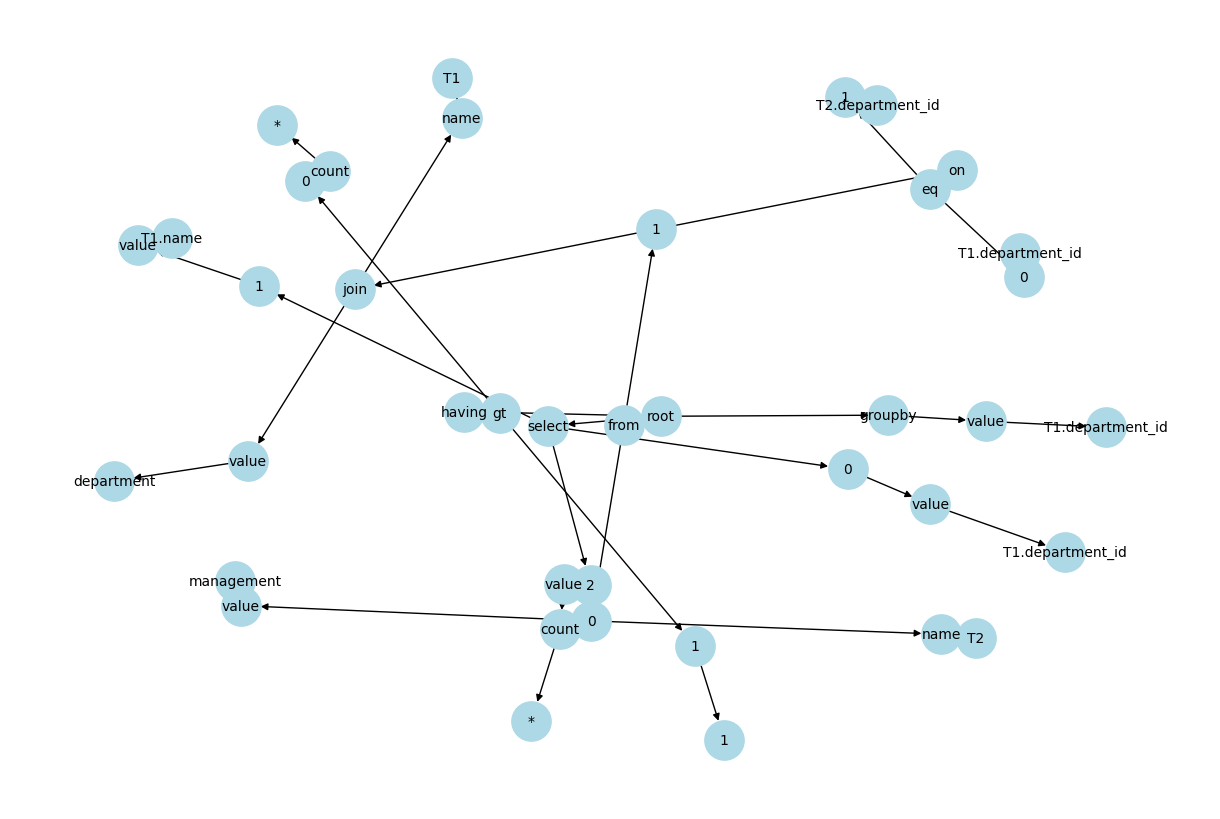

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

def build_tree(data, parent_node, tree):
    if isinstance(data, dict):
        for key, value in data.items():
            node = f"{parent_node}_{key}"
            tree.add_node(node, label=key)
            tree.add_edge(parent_node, node)
            build_tree(value, node, tree)
    elif isinstance(data, list):
        for i, item in enumerate(data):
            item_node = f"{parent_node}_{i}"
            tree.add_node(item_node, label=str(i))
            tree.add_edge(parent_node, item_node)
            build_tree(item, item_node, tree)
    else:
        leaf_node = f"{parent_node}_leaf"
        tree.add_node(leaf_node, label=data)
        tree.add_edge(parent_node, leaf_node)

data = {
    'select': [
        {'value': 'T1.department_id'},
        {'value': 'T1.name'},
        {'value': {'count': '*'}}
    ],
    'from': [
        {'value': 'management', 'name': 'T2'},
        {
            'join': {
                'name': 'T1',
                'value': 'department'
            },
            'on': {
                'eq': ['T1.department_id', 'T2.department_id']
            }
        }
    ],
    'groupby': {'value': 'T1.department_id'},
    'having': {'gt': [{'count': '*'}, 1]}
}

tree = nx.DiGraph()
tree.add_node("root", label="root")
build_tree(data, "root", tree)

pos = nx.spring_layout(tree)
labels = nx.get_node_attributes(tree, "label")

plt.figure(figsize=(12, 8))
nx.draw(tree, pos, with_labels=True, labels=labels, node_size=800, node_color="lightblue", font_size=10)
plt.axis("off")
plt.show()

